# Comparison

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GreaterThan`
Compare two integers.

Implements $U|a\rangle|b\rangle|0\rangle \rightarrow
|a\rangle|b\rangle|a > b\rangle$ using $8n T$  gates.

The bloq_counts and t_complexity are derived from equivalent qualtran gates
assuming a clean decomposition which should yield identical costs.

See: https://github.com/quantumlib/Qualtran/pull/381 and
https://qualtran.readthedocs.io/en/latest/bloqs/comparison_gates.html

#### Parameters
 - `bitsize`: Number of bits used to represent the two integers a and b. 

#### Registers
 - `a`: n-bit-sized input registers.
 - `b`: n-bit-sized input registers.
 - `target`: A single bit output register to store the result of A > B.


In [2]:
from qualtran.bloqs.arithmetic import GreaterThan

### Example Instances

In [3]:
greater_than = GreaterThan(a_bitsize=4, b_bitsize=4)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([greater_than],
           ['`greater_than`'])

### Call Graph

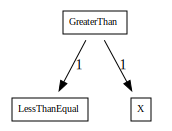

#### Counts totals:
 - `LessThanEqual`: 1
 - `X`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
greater_than_g, greater_than_sigma = greater_than.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(greater_than_g)
show_counts_sigma(greater_than_sigma)

## `GreaterThanConstant`
Implements $U_a|x\rangle = U_a|x\rangle|z\rangle = |x\rangle |z \land (x > a)\rangle$

The bloq_counts and t_complexity are derived from equivalent qualtran gates
assuming a clean decomposition which should yield identical costs.

See: https://github.com/quantumlib/Qualtran/pull/381 and
https://qualtran.readthedocs.io/en/latest/bloqs/comparison_gates.html


#### Parameters
 - `bitsize`: bitsize of x register.
 - `val`: integer to compare x against (a above.) 

#### Registers
 - `x`: Register to compare against val.
 - `target`: Register to hold result of comparison.


In [6]:
from qualtran.bloqs.arithmetic import GreaterThanConstant

### Example Instances

In [7]:
gt_k = GreaterThanConstant(bitsize=4, val=13)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([gt_k],
           ['`gt_k`'])

### Call Graph

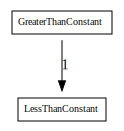

#### Counts totals:
 - `LessThanConstant`: 1

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
gt_k_g, gt_k_sigma = gt_k.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gt_k_g)
show_counts_sigma(gt_k_sigma)

## `EqualsAConstant`
Implements $U_a|x\rangle|z\rangle = |x\rangle |z \oplus (x = a)\rangle$

The bloq_counts and t_complexity are derived from:
https://qualtran.readthedocs.io/en/latest/bloqs/comparison_gates.html#equality-as-a-special-case

#### Parameters
 - `bitsize`: bitsize of x register.
 - `val`: integer to compare x against (a above.) 

#### Registers
 - `x`: Register to compare against val.
 - `target`: Register to hold result of comparison.


In [10]:
from qualtran.bloqs.arithmetic import EqualsAConstant

### Example Instances

In [11]:
eq_k = EqualsAConstant(bitsize=4, val=13)

#### Graphical Signature

In [12]:
from qualtran.drawing import show_bloqs
show_bloqs([eq_k],
           ['`eq_k`'])

### Call Graph

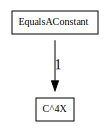

#### Counts totals:
 - `C^4X`: 1

In [13]:
from qualtran.resource_counting.generalizers import ignore_split_join
eq_k_g, eq_k_sigma = eq_k.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(eq_k_g)
show_counts_sigma(eq_k_sigma)

## `LessThanConstant`
Applies $U_a\ket{x}\ket{z} \rightarrow \ket{x} \ket{z \oplus (x < a)}$

In [14]:
from qualtran.bloqs.arithmetic import LessThanConstant

### Example Instances

In [15]:
n, k = sympy.symbols("n k")
lt_k_symb = LessThanConstant(bitsize=n, less_than_val=k)

In [16]:
lt_k = LessThanConstant(bitsize=8, less_than_val=5)

#### Graphical Signature

In [17]:
from qualtran.drawing import show_bloqs
show_bloqs([lt_k, lt_k_symb],
           ['`lt_k`', '`lt_k_symb`'])

### Call Graph

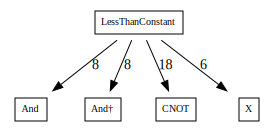

#### Counts totals:
 - `And`: 8
 - `And†`: 8
 - `CNOT`: 18
 - `X`: 6

In [18]:
from qualtran.resource_counting.generalizers import ignore_split_join
lt_k_g, lt_k_sigma = lt_k.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lt_k_g)
show_counts_sigma(lt_k_sigma)

## `BiQubitsMixer`
Implements the COMPARE2 subroutine from the reference.

This gates mixes the values in a way that preserves the result of comparison.
The signature being compared are 2-qubit signature where

    x = 2*x_msb + x_lsb
    y = 2*y_msb + y_lsb

The Gate mixes the 4 qubits so that sign(x - y) = sign(x_lsb' - y_lsb') where x_lsb' and y_lsb'
are the final values of x_lsb' and y_lsb'.

Note that the ancilla qubits are used to reduce the T-count and the user
should clean the qubits at a later point in time with the adjoint gate.
See: https://github.com/quantumlib/Cirq/pull/6313 and
https://github.com/quantumlib/Qualtran/issues/389

#### References
 - [Improved Techniques for Preparing Eigenstates of Fermionic Hamiltonians](https://arxiv.org/abs/1711.10460). Berry et al. 2017. Appendix B. Fig 3.


In [19]:
from qualtran.bloqs.arithmetic import BiQubitsMixer

### Example Instances

In [20]:
bi_qubits_mixer = BiQubitsMixer()

#### Graphical Signature

In [21]:
from qualtran.drawing import show_bloqs
show_bloqs([bi_qubits_mixer],
           ['`bi_qubits_mixer`'])

### Call Graph

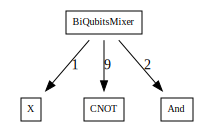

#### Counts totals:
 - `And`: 2
 - `CNOT`: 9
 - `X`: 1

In [22]:
from qualtran.resource_counting.generalizers import ignore_split_join
bi_qubits_mixer_g, bi_qubits_mixer_sigma = bi_qubits_mixer.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(bi_qubits_mixer_g)
show_counts_sigma(bi_qubits_mixer_sigma)

## `SingleQubitCompare`
Applies U|a>|b>|0>|0> = |a> |a=b> |(a<b)> |(a>b)>

#### References
 - [Improved Techniques for Preparing Eigenstates of Fermionic Hamiltonians](https://arxiv.org/abs/1711.10460). Berry et al. 2017. Appendix B. Fig 5.


In [23]:
from qualtran.bloqs.arithmetic import SingleQubitCompare

### Example Instances

In [24]:
sq_cmp = SingleQubitCompare()

#### Graphical Signature

In [25]:
from qualtran.drawing import show_bloqs
show_bloqs([sq_cmp],
           ['`sq_cmp`'])

### Call Graph

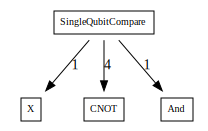

#### Counts totals:
 - `And`: 1
 - `CNOT`: 4
 - `X`: 1

In [26]:
from qualtran.resource_counting.generalizers import ignore_split_join
sq_cmp_g, sq_cmp_sigma = sq_cmp.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sq_cmp_g)
show_counts_sigma(sq_cmp_sigma)

## `LessThanEqual`
Applies $U\ket{x}\ket{y}\ket{z} \rightarrow \ket{x} \ket{y} \ket{z \oplus (x \leq y)}$

Decomposes the gate in a T-complexity optimal way.

The construction can be broken in 4 parts:
 1. In case of differing bitsizes then a multicontrol And Gate
    (Section III.A. of the first reference) is used to check whether
    the extra prefix is equal to zero and the result is stored in the `prefix_equality` qubit.
 2. The tree structure (Fig. 2) of the second reference.
    followed by a `SingleQubitCompare` to compute the result of comparison of
    the suffixes of equal length. The result is stored in `less_than` and `greater_than` and
    equality in `qubits[-2]`
 3. The results from the previous two steps are combined to update the target qubit.
 4. The adjoint of the previous operations is added to restore the input qubits
    to their original state and clean the ancilla qubits.

When both registers are of the same size the T complexity is
8n - 4 as in the second reference.

When the registers differ in size and `n` is the size of the smaller one and
`d` is the difference in size, the T complexity is the sum of the tree
decomposition as before giving 8n + O(1); and the T complexity of an `And` gate
over `d` registers giving 4d + O(1). This totals 8n + 4d + O(1).

#### References
 - [Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity](https://arxiv.org/abs/1805.03662). 
 - [Improved Techniques for Preparing Eigenstates of Fermionic Hamiltonians](https://arxiv.org/abs/1711.10460). Berry et al. 2017. Appendix B.


In [27]:
from qualtran.bloqs.arithmetic import LessThanEqual

### Example Instances

In [28]:
n1, n2 = sympy.symbols('n1 n2')
leq_symb = LessThanEqual(x_bitsize=n1, y_bitsize=n2)

In [29]:
leq = LessThanEqual(x_bitsize=4, y_bitsize=8)

#### Graphical Signature

In [30]:
from qualtran.drawing import show_bloqs
show_bloqs([leq, leq_symb],
           ['`leq`', '`leq_symb`'])

### Call Graph

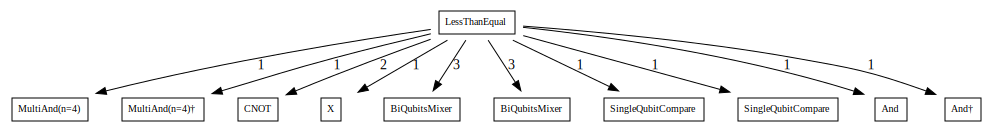

#### Counts totals:
 - `And`: 1
 - `And†`: 1
 - `BiQubitsMixer`: 3
 - `BiQubitsMixer`: 3
 - `CNOT`: 2
 - `MultiAnd(n=4)`: 1
 - `MultiAnd(n=4)†`: 1
 - `SingleQubitCompare`: 1
 - `SingleQubitCompare`: 1
 - `X`: 1

In [31]:
from qualtran.resource_counting.generalizers import ignore_split_join
leq_g, leq_sigma = leq.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(leq_g)
show_counts_sigma(leq_sigma)

## `CLinearDepthGreaterThan`
Controlled greater than between two integers.

Implements $\ket{c}\ket{a}\ket{b}\ket{t} \xrightarrow[]{} \ket{c}\ket{a}\ket{b}\ket{t ⨁ ((a > b)c)}>$
using $n+2$ Toffoli gates.

Note: the true cost is $n+1$ but an extra Toffoli comes from OutOfPlaceAdder which operates
on $n+1$ qubits rather than $n$. Changing the definition of OutOfPlaceAdder will remove this
extra Toffoli.

This comparator relies on the fact that ~(~b + a) = b - a. If a > b, then b - a < 0. We
implement it by flipping all the bits in b, computing the first half of the addition circuit,
copying out the carry, and uncomputing the addition circuit.

#### Parameters
 - `dtype`: type of the integer registers.
 - `cv`: ctrl value at which the bloq is active. 

#### Registers
 - `a`: dtype input registers.
 - `b`: dtype input registers.
 - `target`: A single bit output register to store the result of a > b. 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 
 - [Improved quantum circuits for elliptic curve discrete logarithms](https://arxiv.org/abs/2306.08585).     page 7.


In [32]:
from qualtran.bloqs.arithmetic import CLinearDepthGreaterThan

### Example Instances

In [33]:
clineardepthgreaterthan_example = CLinearDepthGreaterThan(QInt(5))

#### Graphical Signature

In [34]:
from qualtran.drawing import show_bloqs
show_bloqs([clineardepthgreaterthan_example],
           ['`clineardepthgreaterthan_example`'])

### Call Graph

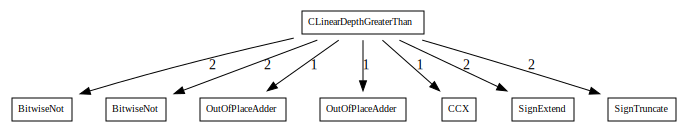

#### Counts totals:
 - `BitwiseNot`: 2
 - `BitwiseNot`: 2
 - `CCX`: 1
 - `OutOfPlaceAdder`: 1
 - `OutOfPlaceAdder`: 1
 - `SignExtend`: 2
 - `SignTruncate`: 2

In [35]:
from qualtran.resource_counting.generalizers import ignore_split_join
clineardepthgreaterthan_example_g, clineardepthgreaterthan_example_sigma = clineardepthgreaterthan_example.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(clineardepthgreaterthan_example_g)
show_counts_sigma(clineardepthgreaterthan_example_sigma)

## `Equals`
Implements |x>|y>|t> => |x>|y>|t ⨁ (x = y)> using $n-1$ Toffoli gates.

#### Parameters
 - `dtype`: Data type of the input registers `x` and `y`. 

#### Registers
 - `x`: First input register.
 - `y`: Second input register.
 - `target`: Register to hold result of comparison.


In [36]:
from qualtran.bloqs.arithmetic import Equals

### Example Instances

In [37]:
equals = Equals(QUInt(4))

#### Graphical Signature

In [38]:
from qualtran.drawing import show_bloqs
show_bloqs([equals],
           ['`equals`'])

### Call Graph

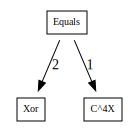

#### Counts totals:
 - `C^4X`: 1
 - `Xor`: 2

In [39]:
from qualtran.resource_counting.generalizers import ignore_split_join
equals_g, equals_sigma = equals.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(equals_g)
show_counts_sigma(equals_sigma)

## `LinearDepthHalfGreaterThan`
Compare two integers while keeping necessary ancillas for zero cost uncomputation.

Implements $\ket{a}\ket{b}\ket{0}\ket{0} \rightarrow \ket{a}\ket{b}\ket{b-a}\ket{a>b}$ using $n$ And gates.

This comparator relies on the fact that c = (b' + a)' = b - a. If a > b, then b - a < 0. We
implement it by flipping all the bits in b, computing the first half of the addition circuit,
copying out the carry, and keeping $c$ for the uncomputation.

#### Parameters
 - `dtype`: dtype of the two integers a and b.
 - `uncompute`: whether this bloq uncomputes or computes the comparison. 

#### Registers
 - `a`: first input register.
 - `b`: second input register.
 - `c`: ancilla register that will contain $b-a$ and will be used for uncomputation.
 - `target`: A single bit output register to store the result of a > b. 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [40]:
from qualtran.bloqs.arithmetic import LinearDepthHalfGreaterThan

### Example Instances

In [41]:
lineardepthhalfgreaterthan_small = LinearDepthHalfGreaterThan(QUInt(3))

#### Graphical Signature

In [42]:
from qualtran.drawing import show_bloqs
show_bloqs([lineardepthhalfgreaterthan_small],
           ['`lineardepthhalfgreaterthan_small`'])

### Call Graph

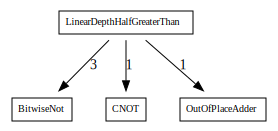

#### Counts totals:
 - `BitwiseNot`: 3
 - `CNOT`: 1
 - `OutOfPlaceAdder`: 1

In [43]:
from qualtran.resource_counting.generalizers import ignore_split_join
lineardepthhalfgreaterthan_small_g, lineardepthhalfgreaterthan_small_sigma = lineardepthhalfgreaterthan_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lineardepthhalfgreaterthan_small_g)
show_counts_sigma(lineardepthhalfgreaterthan_small_sigma)

## `LinearDepthHalfGreaterThanEqual`
Compare two integers while keeping necessary ancillas for zero cost uncomputation.

Implements $\ket{a}\ket{b}\ket{0}\ket{0} \rightarrow \ket{a}\ket{b}\ket{a-b}\ket{a \geq b}$ using $n$ And gates.

This comparator relies on the fact that c = (b' + a)' = b - a. If a > b, then b - a < 0. We
implement it by flipping all the bits in b, computing the first half of the addition circuit,
copying out the carry, and keeping $c$ for the uncomputation.

#### Parameters
 - `dtype`: dtype of the two integers a and b.
 - `uncompute`: whether this bloq uncomputes or computes the comparison. 

#### Registers
 - `a`: first input register.
 - `b`: second input register.
 - `c`: ancilla register that will contain $b-a$ and will be used for uncomputation.
 - `target`: A single bit output register to store the result of a >= b. 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [44]:
from qualtran.bloqs.arithmetic import LinearDepthHalfGreaterThanEqual

### Example Instances

In [45]:
lineardepthhalfgreaterthanequal_small = LinearDepthHalfGreaterThanEqual(QUInt(3))

#### Graphical Signature

In [46]:
from qualtran.drawing import show_bloqs
show_bloqs([lineardepthhalfgreaterthanequal_small],
           ['`lineardepthhalfgreaterthanequal_small`'])

### Call Graph

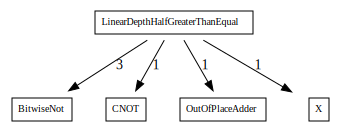

#### Counts totals:
 - `BitwiseNot`: 3
 - `CNOT`: 1
 - `OutOfPlaceAdder`: 1
 - `X`: 1

In [47]:
from qualtran.resource_counting.generalizers import ignore_split_join
lineardepthhalfgreaterthanequal_small_g, lineardepthhalfgreaterthanequal_small_sigma = lineardepthhalfgreaterthanequal_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lineardepthhalfgreaterthanequal_small_g)
show_counts_sigma(lineardepthhalfgreaterthanequal_small_sigma)

## `LinearDepthHalfLessThan`
Compare two integers while keeping necessary ancillas for zero cost uncomputation.

Implements $\ket{a}\ket{b}\ket{0}\ket{0} \rightarrow \ket{a}\ket{b}\ket{a-b}\ket{a<b}$ using $n$ And gates.

This comparator relies on the fact that c = (b' + a)' = b - a. If a > b, then b - a < 0. We
implement it by flipping all the bits in b, computing the first half of the addition circuit,
copying out the carry, and keeping $c$ for the uncomputation.

#### Parameters
 - `dtype`: dtype of the two integers a and b.
 - `uncompute`: whether this bloq uncomputes or computes the comparison. 

#### Registers
 - `a`: first input register.
 - `b`: second input register.
 - `c`: ancilla register that will contain $b-a$ and will be used for uncomputation.
 - `target`: A single bit output register to store the result of a < b. 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [48]:
from qualtran.bloqs.arithmetic import LinearDepthHalfLessThan

### Example Instances

In [49]:
lineardepthhalflessthan_small = LinearDepthHalfLessThan(QUInt(3))

#### Graphical Signature

In [50]:
from qualtran.drawing import show_bloqs
show_bloqs([lineardepthhalflessthan_small],
           ['`lineardepthhalflessthan_small`'])

### Call Graph

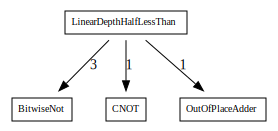

#### Counts totals:
 - `BitwiseNot`: 3
 - `CNOT`: 1
 - `OutOfPlaceAdder`: 1

In [51]:
from qualtran.resource_counting.generalizers import ignore_split_join
lineardepthhalflessthan_small_g, lineardepthhalflessthan_small_sigma = lineardepthhalflessthan_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lineardepthhalflessthan_small_g)
show_counts_sigma(lineardepthhalflessthan_small_sigma)

## `LinearDepthHalfLessThanEqual`
Compare two integers while keeping necessary ancillas for zero cost uncomputation.

Implements $\ket{a}\ket{b}\ket{0}\ket{0} \rightarrow \ket{a}\ket{b}\ket{b-a}\ket{a \leq b}$ using $n$ And gates.

This comparator relies on the fact that c = (b' + a)' = b - a. If a > b, then b - a < 0. We
implement it by flipping all the bits in b, computing the first half of the addition circuit,
copying out the carry, and keeping $c$ for the uncomputation.

#### Parameters
 - `dtype`: dtype of the two integers a and b.
 - `uncompute`: whether this bloq uncomputes or computes the comparison. 

#### Registers
 - `a`: first input register.
 - `b`: second input register.
 - `c`: ancilla register that will contain $b-a$ and will be used for uncomputation.
 - `target`: A single bit output register to store the result of a <= b. 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [52]:
from qualtran.bloqs.arithmetic import LinearDepthHalfLessThanEqual

### Example Instances

In [53]:
lineardepthhalflessthanequal_small = LinearDepthHalfLessThanEqual(QUInt(3))

#### Graphical Signature

In [54]:
from qualtran.drawing import show_bloqs
show_bloqs([lineardepthhalflessthanequal_small],
           ['`lineardepthhalflessthanequal_small`'])

### Call Graph

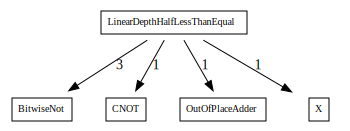

#### Counts totals:
 - `BitwiseNot`: 3
 - `CNOT`: 1
 - `OutOfPlaceAdder`: 1
 - `X`: 1

In [55]:
from qualtran.resource_counting.generalizers import ignore_split_join
lineardepthhalflessthanequal_small_g, lineardepthhalflessthanequal_small_sigma = lineardepthhalflessthanequal_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lineardepthhalflessthanequal_small_g)
show_counts_sigma(lineardepthhalflessthanequal_small_sigma)